In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

  6520832/228813984 [..............................] - ETA: 1:41

KeyboardInterrupt: 

In [3]:
from pathlib import Path
data_dir = Path(r"C:\Users\annch\OneDrive\Desktop\master\ocr\dataset")

C:\Users\annch\OneDrive\Desktop\master\ocr\dataset\1\GHSF_00.png


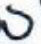

In [4]:
roses = list(data_dir.glob('1/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [5]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 47855 files belonging to 33 classes.
Using 38284 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 47855 files belonging to 33 classes.
Using 9571 files for validation.


In [7]:
class_names = train_ds.class_names
print(len(class_names))

33


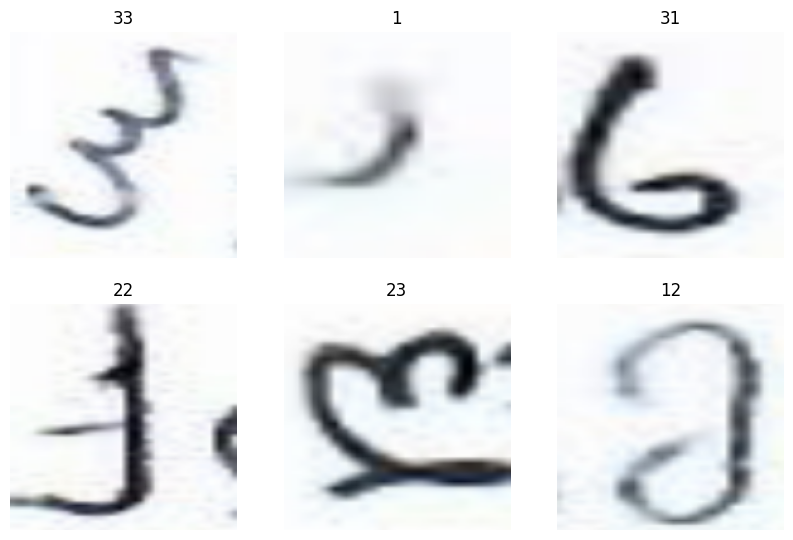

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training The Model


In [9]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg', classes=33,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(33, activation='softmax'))

In [10]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 33)               16929     
 pper)                                                           
                                                                 
Total params: 24,653,729
Trainable params: 1,066,017
Non-trainable params: 23,587,712
____________________________________

In [11]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


1197/1197 [==============================] - 1611s 1s/step - loss: 1.1382 - accuracy: 0.6760 - val_loss: 0.8475 - val_accuracy: 0.7618
Epoch 2/10
1197/1197 [==============================] - 1470s 1s/step - loss: 0.6894 - accuracy: 0.8017 - val_loss: 0.7364 - val_accuracy: 0.7927
Epoch 3/10
1197/1197 [==============================] - 1478s 1s/step - loss: 0.5639 - accuracy: 0.8426 - val_loss: 0.7206 - val_accuracy: 0.7946
Epoch 4/10
1197/1197 [==============================] - 1763s 1s/step - loss: 0.4893 - accuracy: 0.8639 - val_loss: 0.6398 - val_accuracy: 0.8251
Epoch 5/10
1197/1197 [==============================] - 1560s 1s/step - loss: 0.4286 - accuracy: 0.8791 - val_loss: 0.6476 - val_accuracy: 0.8273
Epoch 6/10
1197/1197 [==============================] - 1699s 1s/step - loss: 0.3878 - accuracy: 0.8935 - val_loss: 0.6582 - val_accuracy: 0.8284
Epoch 7/10
1197/1197 [==============================] - 1550s 1s/step - loss: 0.3387 - accuracy: 0.9057 - val_loss: 0.6336 - val_accura

# Evaluating The Model

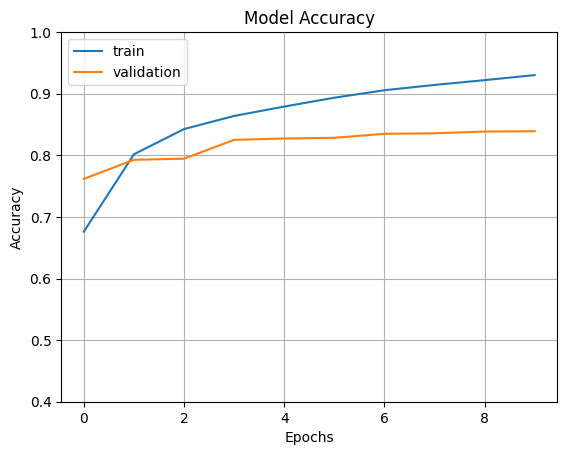

In [13]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

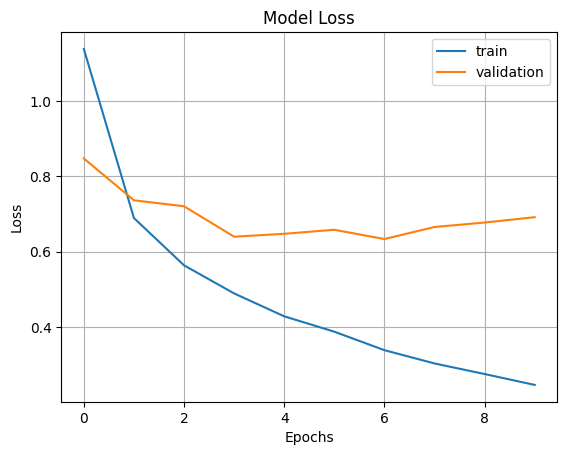

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

In [24]:
import cv2
image=cv2.imread(r'C:\Users\annch\OneDrive\Desktop\master\ocr\result\xeli_1.png')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


In [25]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 149ms/step
[[2.0055584e-06 4.7523156e-07 6.5504957e-04 4.1272700e-01 5.0735816e-06
  1.7800089e-07 1.0428058e-09 9.3076176e-07 3.2036340e-07 9.4657530e-08
  1.8420174e-10 1.3630800e-07 3.1255666e-08 3.5169215e-10 8.1605460e-05
  7.7416244e-06 4.3802347e-11 5.3113229e-09 6.5363579e-06 9.5363450e-10
  8.0012644e-05 9.1266526e-07 1.9708755e-06 2.6650357e-10 3.8010035e-09
  4.4654259e-11 1.1558312e-10 5.4873595e-05 5.7793480e-01 6.0973639e-09
  3.6841434e-09 1.3284761e-06 8.4388861e-03]]


In [26]:
from config import ConstantConfig
encoder = ConstantConfig.ENCODER

In [27]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is",encoder.inverse[int(output_class)])

The predicted class is ე
